# Introduction to Deep Learning
## Welcome to Deep Learning for Business Applications!

In this section, we introduce the concept of deep learning and its significance in modern AI. Deep learning leverages neural networks (including Convolutional Neural Networks and Deep Generative Models) to solve complex problems.

Key Topics:

- Neural Networks
- Convolutional Neural Networks (CNNs)
- Generative Models (e.g., Diffusion Models)
Question for Reflection:

- How do you think deep learning can create a competitive edge in business analytics?

## What is Deep Learning?

### Understanding Deep Learning

Deep learning is a subset of machine learning that uses artificial neural networks to automatically extract features from large amounts of data. It has become a cornerstone for advancements in computer vision, natural language processing, and beyond.

Question for Reflection:

- How does automatic feature extraction differ from traditional manual feature engineering?

In [1]:
import torch
import torch.nn as nn

# Define a simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self, input_size=5):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Create the model instance
model = SimpleNN(input_size=5)
print("Simple Neural Network Architecture:")
print(model)


Simple Neural Network Architecture:
SimpleNN(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Discussion:

The printed model architecture shows how a simple neural network is built in PyTorch using linear layers and activation functions. Notice how the network structure clearly defines the forward pass.

Question:

- Why might a business prefer a deep learning approach over traditional machine learning when dealing with complex datasets?

## The Perceptron

### The Perceptron – The Building Block of Neural Networks

The perceptron is the simplest type of artificial neuron used for binary classification. It computes a weighted sum of inputs and passes the result through an activation function.

Question for Reflection:

- Can you think of a simple business decision that could be modeled as a binary classification problem?

In [ ]:
import numpy as np

def step_function(x):
    return np.where(x >= 0, 1, 0)

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Initialize weights with small random values, +1 for the bias term
        self.weights = np.random.randn(input_size + 1) * 0.01
        self.learning_rate = learning_rate

    def predict(self, x):
        # Add bias input of 1
        x = np.insert(x, 0, 1)
        # Compute the weighted sum
        weighted_sum = np.dot(x, self.weights)
        # Apply the step activation function
        return step_function(weighted_sum)

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for xi, target in zip(X, y):
                xi_bias = np.insert(xi, 0, 1)
                prediction = self.predict(xi)
                error = target - prediction
                self.weights += self.learning_rate * error * xi_bias

# Example data: OR logic gate (simple binary classification)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 1])

# Train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y, epochs=10)

# Test the perceptron
print("Perceptron predictions for OR gate:")
for xi in X:
    print(f"Input {xi} -> Predicted: {perceptron.predict(xi)}")


Discussion:

This simple perceptron model learned the OR gate logic. Even though it’s basic, it forms the foundation for more complex deep learning architectures.

Question:

- How would you extend this model to handle multi-class classification?

## Common Activation Functions

### Activation Functions in Neural Networks

Activation functions introduce non-linearity to the network, allowing it to learn complex patterns. Common functions include:

- Sigmoid
- ReLU (Rectified Linear Unit)
- Tanh
- Softmax

Question for Reflection:

- How might the choice of activation function impact model performance and training speed?

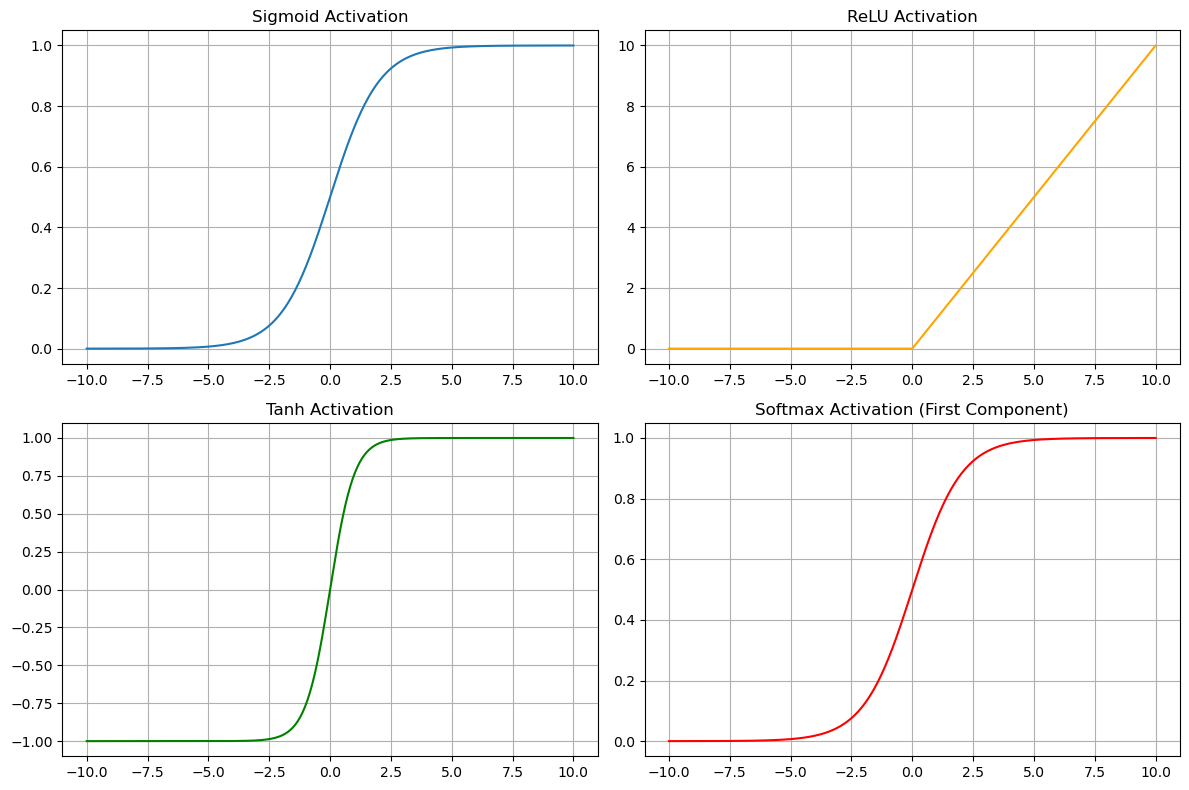

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

# Create an array of values
x = np.linspace(-10, 10, 400)

# Compute the functions
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# For softmax, demonstrate on a 2-element vector for each x value (this is a bit contrived)
# Here, we compute softmax on two values: x and 0.
y_softmax = np.array([softmax([val, 0]) for val in x])
y_softmax_first_component = y_softmax[:, 0]

# Plot the activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.title('Sigmoid Activation')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, y_relu, label='ReLU', color='orange')
plt.title('ReLU Activation')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, y_tanh, label='Tanh', color='green')
plt.title('Tanh Activation')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x, y_softmax_first_component, label='Softmax (Component 1)', color='red')
plt.title('Softmax Activation (First Component)')
plt.grid(True)

plt.tight_layout()
plt.show()


Discussion:

The plots illustrate how each activation function behaves over a range of inputs. Notice how ReLU simply thresholds at 0, while Sigmoid and Tanh smoothly saturate at their extremes.

Question:

- Based on these plots, when might you prefer using ReLU over Sigmoid in a deep learning model?

## Building Neural Networks with Perceptrons

### Stacking Perceptrons to Build Neural Networks

By combining multiple perceptrons, we can create multi-layer neural networks that capture more intricate patterns in the data. This is the basic idea behind deep architectures.

Question for Reflection:

- What advantages do deep (multi-layer) architectures offer compared to single-layer networks?

In [ ]:
import torch
import torch.nn as nn

# Define a simple MLP for binary classification
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.layer1 = nn.Linear(4, 16)
        self.layer2 = nn.Linear(16, 8)
        self.layer3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Create and print the model
model_mlp = SimpleMLP()
print("Simple MLP Architecture:")
print(model_mlp)


Discussion:

This MLP model shows how stacking layers (each a collection of perceptrons) allows the network to learn complex, non-linear relationships. In business applications, such models are used for tasks such as customer segmentation and fraud detection.

Question:

- How might increasing the number of layers or neurons affect the model’s ability to generalize?

## Empirical Loss

### Measuring Model Performance with Loss Functions

Loss functions quantify how well a neural network’s predictions match the actual targets. For regression, we often use Mean Squared Error (MSE), and for classification, Cross-Entropy Loss is popular.

Question for Reflection:

- Why is minimizing the loss function critical for successful model training?

In [ ]:
import numpy as np

# Dummy data: true values and predictions
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8])

# Calculate Mean Squared Error
mse = np.mean((y_true - y_pred) ** 2)
print("Mean Squared Error:", mse)


Discussion:

The Mean Squared Error (MSE) gives us a measure of the average squared difference between our predictions and the actual values. A lower MSE indicates a better performing model.

Question:

- What might be some limitations of using MSE in certain business applications?

## Training Neural Networks

### Training Neural Networks: From Backpropagation to Gradient Descent

Training involves adjusting the model’s weights to minimize the loss function. Techniques like backpropagation compute the gradients, and gradient descent updates the weights.

Question for Reflection:

- What challenges might you face when training a deep network on real-world business data?

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data.astype(np.float32)
y = iris.target.astype(np.int64)  # CrossEntropyLoss expects class indices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
test_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define a simple network for Iris classification
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)  # 3 output classes
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # raw logits; CrossEntropyLoss applies softmax internally
        return x

model_train = IrisNet()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_train.parameters(), lr=0.01)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model_train.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_train(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# Evaluation on test data
model_train.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model_train(batch_X)
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 1.00


Discussion:

The model trains on the Iris dataset using PyTorch. We monitor the training process by adjusting the model’s parameters to minimize the loss. This exercise demonstrates the core idea behind model optimization.

Question:

- How could you apply similar training techniques to a customer churn prediction model?

## Convolutional Neural Networks (CNNs)

### CNNs for Image Processing

Convolutional Neural Networks are designed to extract spatial features from images through convolution and pooling operations. They have transformed industries such as healthcare, security, and autonomous driving.

Question for Reflection:

- Why are convolutional layers particularly effective for visual data analysis in a business context (e.g., quality control in manufacturing)?

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a transform to normalize the MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor and scale to [0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # standard normalization for MNIST
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader  = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader   = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  # from 1 to 32 channels
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2)
        # Calculate the size of the flattened feature map after conv and pooling
        self.fc1 = nn.Linear(64 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)  # flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_cnn = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

# Train the CNN for a few epochs (for demonstration)
num_epochs = 3
for epoch in range(num_epochs):
    model_cnn.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_cnn(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} completed.")

# Evaluate the CNN on test data
model_cnn.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model_cnn(batch_X)
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
accuracy = correct / total
print(f"Test Accuracy on MNIST: {accuracy:.2f}")


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:02<00:00, 4088668.07it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 260831.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:02<00:00, 699929.71it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 19906508.64it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Test Accuracy on MNIST: 0.99


Discussion:

This CNN model demonstrates how convolutional and pooling layers work together to extract features from images. Such techniques are widely used in business for image-based quality control and visual inspection.

Question:

- How might you modify this model if you were to apply it to higher-resolution business images (e.g., satellite imagery for crop monitoring)?

## Diffusion Models

### Diffusion Models in Generative AI

Diffusion models generate high-quality synthetic images (and other data types) by iteratively refining noisy inputs. Although the full models are complex, we can simulate the idea of iterative noise reduction.

Question for Reflection:

- In what ways could generative models transform industries such as marketing or product design?

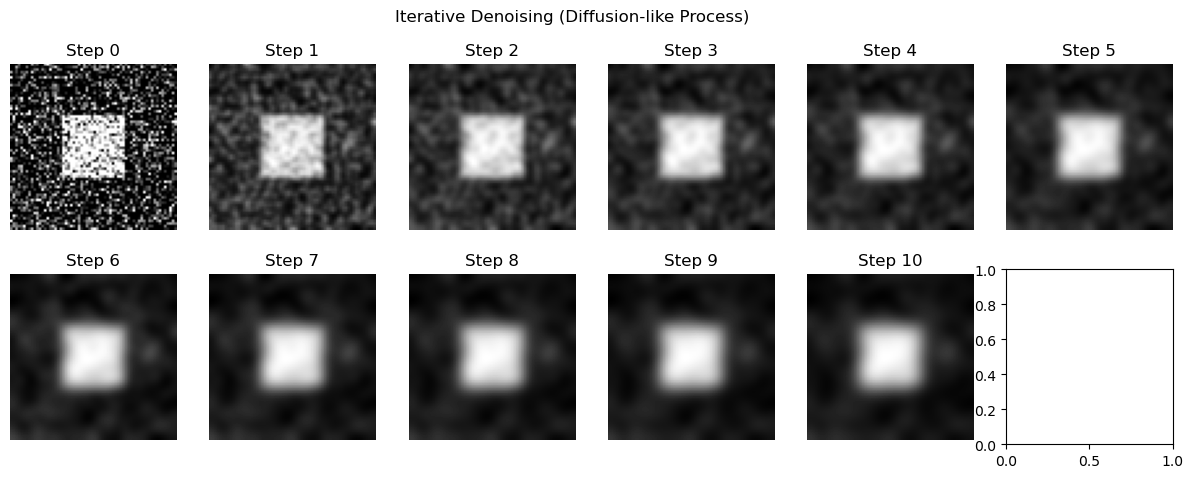

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Create a simple grayscale image (e.g., a centered square)
image = np.zeros((64, 64))
image[20:44, 20:44] = 1  # a white square on a black background

# Function to add noise
def add_noise(img, noise_level=0.3):
    noise = noise_level * np.random.randn(*img.shape)
    return np.clip(img + noise, 0, 1)

# Simulate the diffusion process: iteratively denoise the image
noisy_image = add_noise(image, noise_level=0.5)
iterations = 10
denoised_images = [noisy_image]

for i in range(iterations):
    # Apply a Gaussian filter to simulate denoising (a stand-in for diffusion model steps)
    denoised = gaussian_filter(denoised_images[-1], sigma=1)
    denoised_images.append(denoised)

# Plot the progression
fig, axs = plt.subplots(2, 6, figsize=(15, 5))
axs = axs.ravel()
for i, img in enumerate(denoised_images):
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Step {i}")
plt.suptitle("Iterative Denoising (Diffusion-like Process)")
plt.show()


Discussion:

This simulation shows how an initially noisy image can be gradually refined through repeated processing steps. In real diffusion models, this process is learned and used to generate entirely new images.

Question:

- How do you think the iterative refinement process in diffusion models could be applied to generate synthetic data for business simulations?

## Neural Networks Limitations

### Limitations and Challenges in Deep Learning

Despite their power, neural networks have limitations including:

The need for large labeled datasets
High computational costs
Interpretability issues and the risk of overfitting
Question for Reflection:

What strategies could a business implement to overcome these challenges?

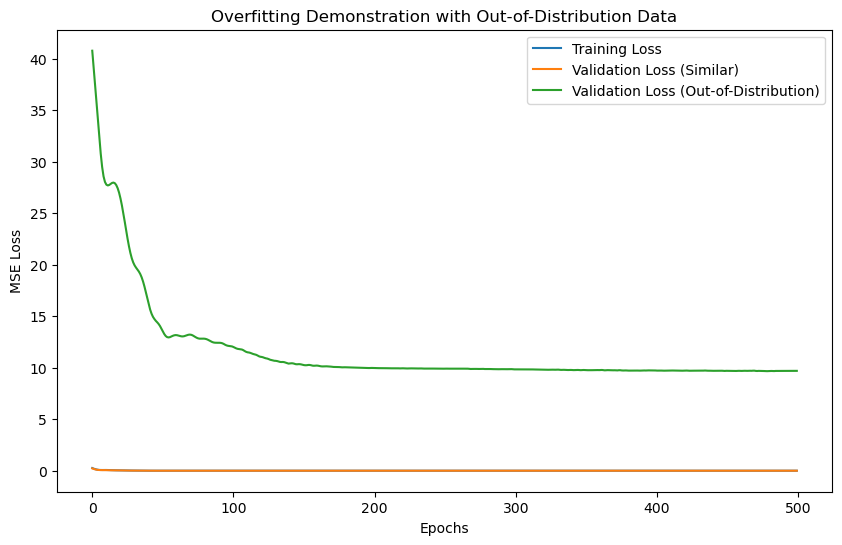

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Define the underlying function: y = x^2 with a bit of noise
def generate_data(x):
    noise = 0.05 * np.random.randn(*x.shape)
    return x**2 + noise

# Create the training data: 20 samples from a uniform distribution in [-1, 1]
n_train = 20
X_train = np.random.uniform(-1, 1, (n_train, 1)).astype(np.float32)
y_train = generate_data(X_train)

# Create validation data:
# 30 samples (about 30%) similar to training: uniform(-1, 1)
n_val_similar = 30
X_val_similar = np.random.uniform(-1, 1, (n_val_similar, 1)).astype(np.float32)
y_val_similar = generate_data(X_val_similar)

# 70 samples (about 70%) out-of-distribution: uniform(2, 3)
n_val_out = 70
X_val_out = np.random.uniform(2, 3, (n_val_out, 1)).astype(np.float32)
y_val_out = generate_data(X_val_out)

# Convert the numpy arrays to PyTorch tensors with explicit float32 type
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_similar_tensor = torch.tensor(X_val_similar, dtype=torch.float32)
y_val_similar_tensor = torch.tensor(y_val_similar, dtype=torch.float32)
X_val_out_tensor = torch.tensor(X_val_out, dtype=torch.float32)
y_val_out_tensor = torch.tensor(y_val_out, dtype=torch.float32)

# Define an over-parameterized neural network to encourage overfitting
class OverfitNet(nn.Module):
    def __init__(self):
        super(OverfitNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = OverfitNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model for many epochs to force overfitting
num_epochs = 500
train_losses = []
val_similar_losses = []
val_out_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    outputs_train = model(X_train_tensor)
    loss_train = criterion(outputs_train, y_train_tensor)
    loss_train.backward()
    optimizer.step()
    train_losses.append(loss_train.item())
    
    # Validation phase: evaluate on both similar and out-of-distribution data
    model.eval()
    with torch.no_grad():
        # Similar validation data
        outputs_val_similar = model(X_val_similar_tensor)
        loss_val_similar = criterion(outputs_val_similar, y_val_similar_tensor)
        val_similar_losses.append(loss_val_similar.item())
        
        # Out-of-distribution validation data
        outputs_val_out = model(X_val_out_tensor)
        loss_val_out = criterion(outputs_val_out, y_val_out_tensor)
        val_out_losses.append(loss_val_out.item())

# Plot training and both validation losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_similar_losses, label='Validation Loss (Similar)')
plt.plot(val_out_losses, label='Validation Loss (Out-of-Distribution)')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Overfitting Demonstration with Out-of-Distribution Data")
plt.legend()
plt.show()


Discussion:

The loss curves indicate that while the model continues to reduce training error, the validation error starts to rise—an indication of overfitting. In business applications, overfitting can lead to models that perform well in the lab but fail in real-world situations.

Question:

- What regularization techniques or data strategies could be used to prevent overfitting in this context?

# Assignment: Customer Subscription Prediction using PyTorch

## Objective

In this assignment, you will build a binary classification model using PyTorch. Your model will predict whether a customer will purchase a subscription service based on a small, synthetic dataset representing customer engagement and spending behavior. The goal is to apply deep learning to a business use case, and your final output will be the test accuracy of your model. For this assignment, your model should achieve a test accuracy of at least 80%.

Instructions
### 1. Dataset Generation (20 minutes)
- Generate a synthetic dataset with 100 samples.
Each sample should include 4 features representing customer data:

    - logins_per_month: Integer (simulate values between 0 and 30)
    - monthly_spending: Float (simulate values between 0 and 1000)
    - support_tickets: Integer (simulate values between 0 and 10)
    - customer_satisfaction: Float (simulate values between 1 and 5)
- Create a target variable purchase (binary: 1 for purchase, 0 for no purchase) using a simple rule. For example, you might compute a “score” as follows:

In [10]:
score = 0.05 * logins_per_month + 0.001 * monthly_spending + 0.1 * support_tickets + 0.2 * customer_satisfaction


NameError: name 'logins_per_month' is not defined

Then, if score > 1.5 (you can adjust the threshold if needed to create a roughly balanced dataset), set purchase to 1; otherwise, set it to 0.

- Split the dataset into:

    - Training set: 70 samples
    - Test set: 30 samples
    
Hint: Use random splitting (set a random seed for reproducibility).

### 2. Model Building (20 minutes)
- Build a multi-layer perceptron (MLP) using PyTorch:
    - Your model should have at least one hidden layer.
    - Use a non-linear activation function (e.g., ReLU) in the hidden layer(s).
    - The output layer should be set up for binary classification. (Hint: Use one output neuron with a sigmoid activation.)

### 3. Training (20 minutes)
- Train your model using:
    - Binary Cross-Entropy Loss as your loss function.
    - An optimizer such as Adam.
    - Train for at least 100 epochs.
- Monitor the training loss. You can print the loss every 10 or 20 epochs to check that the loss is decreasing.

### 4. Evaluation (10–20 minutes)
- Evaluate your model on the test set:

    - Convert the model’s predicted probabilities to binary predictions (Hint: Use torch.round).
    - Calculate the test accuracy (the fraction of correct predictions).
- Print the test accuracy.
Your final output should be similar to:

Note: If your model’s test accuracy is below 80% (i.e., less than 0.80), then your solution is considered incorrect.

In [ ]:
Test Accuracy: 0.85


### 5. Submission
- Submit your completed Jupyter Notebook that contains all the code and outputs.
- Ensure your code runs without errors and prints out the test accuracy.

## Verification Criteria
Your assignment solution will be considered correct if:

- The synthetic dataset is generated with 100 samples and 4 features, and the target variable is computed as described.
- The data is split correctly into training (70 samples) and test (30 samples) sets.
- A PyTorch neural network (MLP) with at least one hidden layer is built and trained for at least 100 epochs.
- The model uses Binary Cross-Entropy Loss and an optimizer (e.g., Adam).
- The final printed test accuracy is at least 80%.
- Your Notebook runs without errors

## Hints and Tips
- Data Conversion: Make sure you convert your NumPy arrays to PyTorch tensors and set the appropriate data type (e.g., torch.float32).
- Activation Function: In the output layer, use torch.sigmoid to obtain probabilities.
- Prediction: Use torch.round to convert probabilities into binary predictions (0 or 1).
- Reproducibility: Set random seeds for both NumPy and PyTorch to ensure reproducible results.

In [ ]:
import torch
import numpy as np

# Example: converting a NumPy array to a float32 tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)


### Sample Outline (Skeleton Code)
Below is a rough outline of the code structure. You do not need to follow this exactly, but it may help you organize your work:

In [ ]:
# Step 1: Dataset Generation
import numpy as np
import torch

np.random.seed(42)
torch.manual_seed(42)

# Generate features
n_samples = 100
logins = np.random.randint(0, 31, (n_samples, 1))
spending = np.random.uniform(0, 1000, (n_samples, 1))
tickets = np.random.randint(0, 11, (n_samples, 1))
satisfaction = np.random.uniform(1, 5, (n_samples, 1))

# Combine features into a single dataset
X = np.hstack([logins, spending, tickets, satisfaction]).astype(np.float32)

# Compute target variable
score = 0.05 * logins + 0.001 * spending + 0.1 * tickets + 0.2 * satisfaction
threshold = 1.5  # adjust as needed for a balanced dataset
y = (score > threshold).astype(np.float32)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Step 2: Model Building
import torch.nn as nn
import torch.optim as optim

class CustomerNet(nn.Module):
    def __init__(self):
        super(CustomerNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
        
    def forward(self, x):
        x = self.net(x)
        return torch.sigmoid(x)
    
model = CustomerNet()

# Step 3: Training
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.squeeze())
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Step 4: Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    predicted_labels = torch.round(predictions)
    correct = (predicted_labels == y_test_tensor.squeeze()).float().sum()
    accuracy = correct / y_test_tensor.shape[0]
    print(f"Test Accuracy: {accuracy.item():.2f}")


### Reflection
- Why might deep learning be useful in predicting customer behavior in a business context?
-What are some potential challenges when using a small synthetic dataset to model real-world business problems?

By following these instructions and verifying that your final printed test accuracy is at least 80%, you will have successfully completed the assignment. Good luck, and enjoy applying deep learning to a real business scenario!